# PowerGAMA
Example based on a modified 9-bus case

In [1]:
%matplotlib inline

import powergama
import powergama.plots as ppl
import numpy as np
import time
import matplotlib.pyplot as plt
import folium

# Alternative 1: Use example data bundled with the package
import os
pathbase=os.path.split(powergama.__path__[0])[0]
datapath=str(os.path.join(pathbase,'examples','data','9busmod_'))


# Specity time range for simulation
timerange=range(24*100,24*100+24*2)

data = powergama.GridData()
data.readGridData(nodes=datapath+"nodes.csv",
                  ac_branches=datapath+"branches.csv",
                  dc_branches=None,
                  generators=datapath+"generators.csv",
                  consumers=datapath+"consumers.csv")
data.readProfileData(filename=datapath+"profiles.csv",
            storagevalue_filling=datapath+"profiles_storval_filling.csv",
            storagevalue_time=datapath+"profiles_storval_time.csv",
            timerange=timerange, 
            timedelta=1.0)


C:\Users\hsven\AppData\Local\Continuum\anaconda3\lib\site-packages\setuptools\distutils_patch.py:26: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  "Distutils was imported before Setuptools. This usage is discouraged "


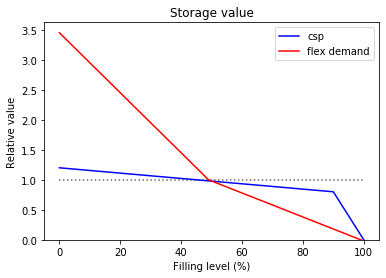

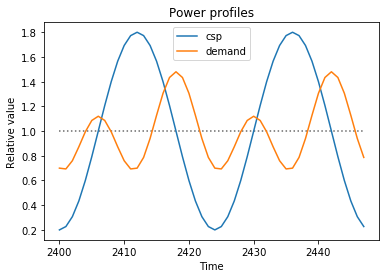

In [2]:
# Plots of input

plt.figure()
plt.plot([0,100],[1,1],linestyle=':',color='dimgray')
plt.plot(data.storagevalue_filling['csp2'],color='blue',label='csp')
plt.plot(data.storagevalue_filling['flexdemand'],color='red',
         label='flex demand')
plt.xlabel('Filling level (%)')
plt.ylabel('Relative value')
plt.ylim(ymin=0)
plt.legend()
plt.title("Storage value")

plt.figure()
plt.plot([timerange[0],timerange[-1]],[1,1],linestyle=':',color='dimgray')
plt.plot(timerange,data.storagevalue_time['csp2'],label='csp')
plt.legend()
#ax2=plt.twinx()
plt.plot(timerange,data.profiles['demand2'],label='demand')
plt.xlabel('Time')
plt.ylabel('Relative value')
plt.legend()
plt.title("Power profiles")
plt.show()

### Case 0

Computing B and DA matrices...
Creating B and DA coefficients...
Found synchronous area (size = 9), using ref node = bus1
Creating LP problem instance...
Initialising LP problem...
Replacing existing SQLite file "C:\Users\hsven\code\powergama\powergama\examples\results.sqlite3"
:) Found solver here: c:\users\hsven\bin\cbc.exe
Solving...
2% 4% 6% 8% 10% 12% 14% 16% 18% 20% 22% 25% 27% 29% 31% 33% 35% 37% 39% 41% 43% 45% 47% 50% 52% 54% 56% 58% 60% 62% 64% 66% 68% 70% 72% 75% 77% 79% 81% 83% 85% 87% 89% 91% 93% 95% 97% 100% 
Simulation time = 4.36 seconds
System costs (CASE 1) = 9.17e+04 EUR
Load shedding = 0.00e+00
Spilled CSP inflow = 0.00e+00


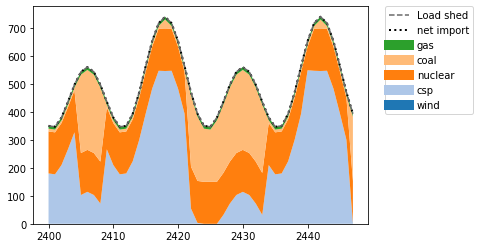

In [3]:
# CASE 0: Base

# Increased generation capacity
data.generator.loc[1,'pmax']=150 # Instead of default=50 (nuclear)
data.generator.loc[3,'pmax']=0 # No wind

lp = powergama.LpProblem(data)
res = powergama.Results(data,"results.sqlite3",replace=True)

start_time = time.time()
lp.solve(res)
end_time = time.time()
print("\nSimulation time = {:.2f} seconds".format(end_time - start_time))

systemcost = res.getSystemCost()['AREA']
print("System costs (CASE 1) = {:.2e} EUR".format(systemcost))
print("Load shedding = {:.2e}".format(sum(res.getLoadheddingInArea('AREA'))))
print("Spilled CSP inflow = {:.2e}".format(
                                    sum(res.getGeneratorSpilled(4))))
res.plotGenerationPerArea('AREA',fill=True,showTitle=False)

#res.plotMapGrid(nodetype='nodalprice',branchtype='sensitivity',
#                show_node_labels=True,dotsize=100,draw_par_mer=False,
#                showTitle=False)

In [4]:
ppl.plotMap(data,res,nodetype='nodalprice',branchtype='sensitivity')

Nodes...
AC branches...
DC branches...
Consumers...
Generators...


### Case 2: CSP without storage

Computing B and DA matrices...
Creating B and DA coefficients...
Found synchronous area (size = 9), using ref node = bus1
Creating LP problem instance...
Initialising LP problem...
Replacing existing SQLite file "C:\Users\hsven\code\powergama\powergama\examples\results.sqlite3"
:) Found solver here: c:\users\hsven\bin\cbc.exe
Solving...
2% 4% 6% 8% 10% 12% 14% 16% 18% 20% 22% 25% 27% 29% 31% 33% 35% 37% 39% 41% 43% 45% 47% 50% 52% 54% 56% 58% 60% 62% 64% 66% 68% 70% 72% 75% 77% 79% 81% 83% 85% 87% 89% 91% 93% 95% 97% 100% 
Simulation time = 4.04 seconds
System costs (CASE 2) = 1.64e+05 EUR
Load shedding = 3.45e+02
Spilled CSP inflow = 2.89e+03


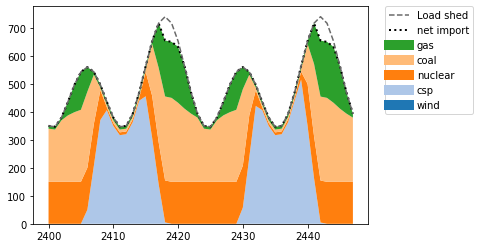

In [5]:
# CASE 2: CSP without storage

#data.generator.set_value(4,'pmax',600) # Instead of default=60 (csp)
data.generator.loc[4,'storage_cap']=0 # No storage

lp = powergama.LpProblem(data)
res = powergama.Results(data,"results.sqlite3",replace=True)

start_time = time.time()
lp.solve(res)
end_time = time.time()
print("\nSimulation time = {:.2f} seconds".format(end_time - start_time))

systemcost = res.getSystemCost()['AREA']
print("System costs (CASE 2) = {:.2e} EUR".format(systemcost))
print("Load shedding = {:.2e}".format(sum(res.getLoadheddingInArea('AREA'))))
print("Spilled CSP inflow = {:.2e}".format(
                                    sum(res.getGeneratorSpilled(4))))

res.plotGenerationPerArea('AREA',fill=True,showTitle=False)


In [6]:
# Requires basemap
#res.plotMapGrid(nodetype='nodalprice',branchtype='sensitivity',
#                show_node_labels=True,dotsize=100,draw_par_mer=False,
#                showTitle=False)
#res.plotMapGrid(nodetype='energybalance',branchtype='utilisation',
#                show_node_labels=True,dotsize=100,draw_par_mer=False,
#                showTitle=False)

# Requires folium
ppl.plotMap(data,res,nodetype='nodalprice',branchtype='sensitivity')


Nodes...
AC branches...
DC branches...
Consumers...
Generators...


In [7]:
ppl.plotMap(data,res,nodetype='energybalance',branchtype='utilisation',
                show_node_labels=True,dotsize=100,draw_par_mer=False,
                showTitle=False)

Nodes...
AC branches...
DC branches...
Consumers...
Generators...


### Case 3: CSP with storage (eliminating load shedding)

Computing B and DA matrices...
Creating B and DA coefficients...
Found synchronous area (size = 9), using ref node = bus1
Creating LP problem instance...
Initialising LP problem...
Replacing existing SQLite file "C:\Users\hsven\code\powergama\powergama\examples\results.sqlite3"
:) Found solver here: c:\users\hsven\bin\cbc.exe
Solving...
2% 4% 6% 8% 10% 12% 14% 16% 18% 20% 22% 25% 27% 29% 31% 33% 35% 37% 39% 41% 43% 45% 47% 50% 52% 54% 56% 58% 60% 62% 64% 66% 68% 70% 72% 75% 77% 79% 81% 83% 85% 87% 89% 91% 93% 95% 97% 100% 
Simulation time = 3.25 seconds
System costs (CASE 3) = 9.17e+04 EUR
Load shedding = 0.00e+00
Spilled CSP inflow = 0.00e+00


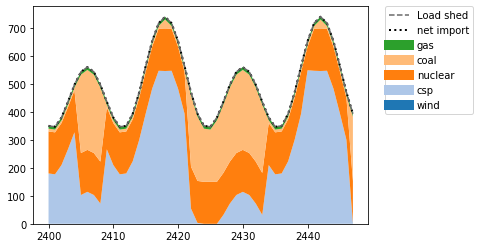

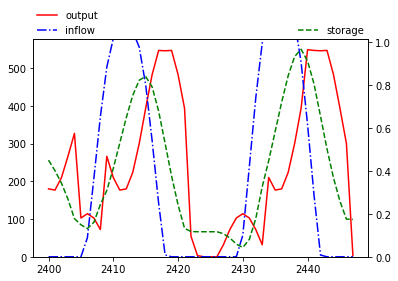

In [8]:
# CASE 3: 

# Increased generation capacity
data.generator.loc[4,'pmax']=600 # Instead of default=60 (csp)
data.generator.loc[4,'storage_cap']=600*6 # back to original
 
lp = powergama.LpProblem(data)
res = powergama.Results(data,"results.sqlite3",replace=True)

start_time = time.time()
lp.solve(res)
end_time = time.time()
print("\nSimulation time = {:.2f} seconds".format(end_time - start_time))

systemcost = res.getSystemCost()['AREA']
print("System costs (CASE 3) = {:.2e} EUR".format(systemcost))
print("Load shedding = {:.2e}".format(sum(res.getLoadheddingInArea('AREA'))))
print("Spilled CSP inflow = {:.2e}".format(
                                    sum(res.getGeneratorSpilled(4))))

res.plotGenerationPerArea('AREA',fill=True,showTitle=False)

res.plotGeneratorOutput(4,showTitle=False)

In [13]:
ppl.plotMap(data,res,nodetype='nodalprice',branchtype='sensitivity')

Nodes...
AC branches...
DC branches...
Consumers...
Generators...


### Case 4: CSP with storage (eliminating load shedding), time-dependent

Computing B and DA matrices...
Creating B and DA coefficients...
Found synchronous area (size = 9), using ref node = bus1
Creating LP problem instance...
Initialising LP problem...
Replacing existing SQLite file "C:\Users\hsven\code\powergama\powergama\examples\results.sqlite3"
:) Found solver here: c:\users\hsven\bin\cbc.exe
Solving...
2% 4% 6% 8% 10% 12% 14% 16% 18% 20% 22% 25% 27% 29% 31% 33% 35% 37% 39% 41% 43% 45% 47% 50% 52% 54% 56% 58% 60% 62% 64% 66% 68% 70% 72% 75% 77% 79% 81% 83% 85% 87% 89% 91% 93% 95% 97% 100% 
Simulation time = 3.06 seconds
System costs (CASE 4) = 9.17e+04 EUR
Load shedding = 0.00e+00
Spilled CSP inflow = 0.00e+00


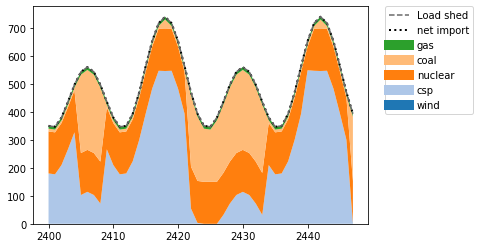

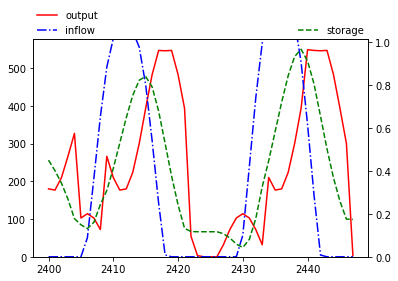

In [14]:
# CASE 4: CSP with storage (eliminating load shedding), time-dependent

# Increased generation capacity
data.generator.loc[4,'storagevalue_profile_filling']='const'
data.generator.loc[4,'storagevalue_profile_time']='csp2'
 
lp = powergama.LpProblem(data)
res = powergama.Results(data,"results.sqlite3",replace=True)

start_time = time.time()
lp.solve(res)
end_time = time.time()
print("\nSimulation time = {:.2f} seconds".format(end_time - start_time))

systemcost = res.getSystemCost()['AREA']
print("System costs (CASE 4) = {:.2e} EUR".format(systemcost))
print("Load shedding = {:.2e}".format(sum(res.getLoadheddingInArea('AREA'))))
print("Spilled CSP inflow = {:.2e}".format(
                                    sum(res.getGeneratorSpilled(4))))

res.plotGenerationPerArea('AREA',fill=True,showTitle=False)
res.plotGeneratorOutput(4,showTitle=False)

### Case 5: CSP with storage - constant values

Computing B and DA matrices...
Creating B and DA coefficients...
Found synchronous area (size = 9), using ref node = bus1
Creating LP problem instance...
Initialising LP problem...
Replacing existing SQLite file "C:\Users\hsven\code\powergama\powergama\examples\results.sqlite3"
:) Found solver here: c:\users\hsven\bin\cbc.exe
Solving...
2% 4% 6% 8% 10% 12% 14% 16% 18% 20% 22% 25% 27% 29% 31% 33% 35% 37% 39% 41% 43% 45% 47% 50% 52% 54% 56% 58% 60% 62% 64% 66% 68% 70% 72% 75% 77% 79% 81% 83% 85% 87% 89% 91% 93% 95% 97% 100% 
Simulation time = 3.15 seconds
System costs (CASE 5) = 9.17e+04 EUR
Load shedding = 0.00e+00
Spilled CSP inflow = 0.00e+00


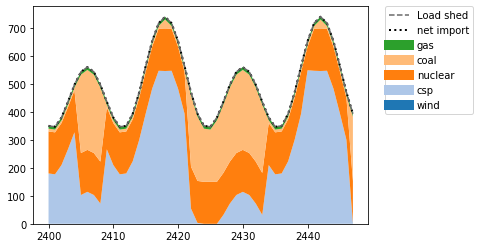

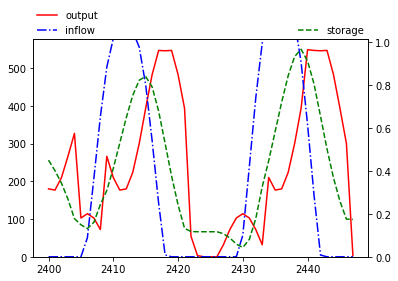

In [15]:
# CASE 5: CSP with storage - constant values

# Increased generation capacity
data.generator.loc[4,'storagevalue_profile_filling']='const'
data.generator.loc[4,'storagevalue_profile_time']='const'
 
lp = powergama.LpProblem(data)
res = powergama.Results(data,"results.sqlite3",replace=True)

start_time = time.time()
lp.solve(res)
end_time = time.time()
print("\nSimulation time = {:.2f} seconds".format(end_time - start_time))

systemcost = res.getSystemCost()['AREA']
print("System costs (CASE 5) = {:.2e} EUR".format(systemcost))
print("Load shedding = {:.2e}".format(sum(res.getLoadheddingInArea('AREA'))))
print("Spilled CSP inflow = {:.2e}".format(
                                    sum(res.getGeneratorSpilled(4))))

res.plotGenerationPerArea('AREA',fill=True,showTitle=False)
res.plotGeneratorOutput(4,showTitle=False)

## Case 6: Flexible demand

This case illustrates flexible demand using storage values

Computing B and DA matrices...
Creating B and DA coefficients...
Found synchronous area (size = 9), using ref node = bus1
Creating LP problem instance...
Initialising LP problem...
Replacing existing SQLite file "C:\Users\hsven\code\powergama\powergama\examples\results.sqlite3"
:) Found solver here: c:\users\hsven\bin\cbc.exe
Solving...
2% 4% 6% 8% 10% 12% 14% 16% 18% 20% 22% 25% 27% 29% 31% 33% 35% 37% 39% 41% 43% 45% 47% 50% 52% 54% 56% 58% 60% 62% 64% 66% 68% 70% 72% 75% 77% 79% 81% 83% 85% 87% 89% 91% 93% 95% 97% 100% 
Simulation time = 3.82 seconds
System costs (CASE 6) = 1.49e+05 EUR
Load shedding = 0.00e+00
Spilled CSP inflow = 2.49e+03


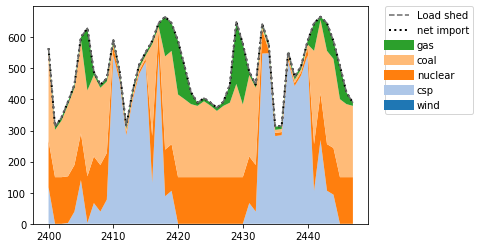

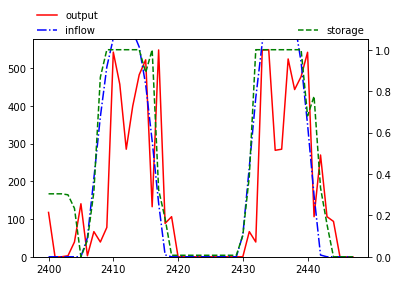

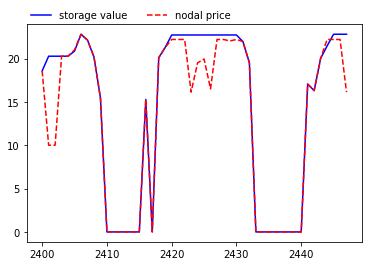

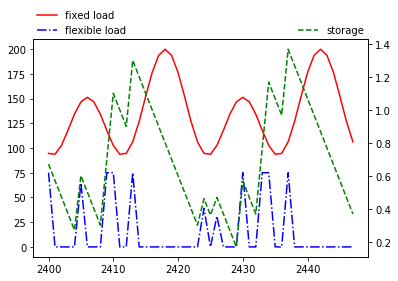

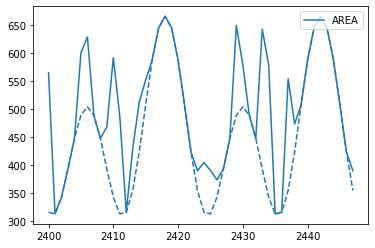

In [16]:
# CASE 6: Less storage + flexible demand

# Increased generation capacity
data.generator.loc[4,'storval_filling_ref']='csp2'
data.generator.loc[4,'storval_time_ref']='const'
data.generator.loc[4,'storage_price']=19
data.generator.loc[4,'storage_cap']=600*1 # no storage - cf CASE 2
numCons=data.numConsumers()
data.consumer['flex_basevalue'] = [10]*numCons
data.consumer['flex_fraction'] = [0.10]*numCons
data.consumer['flex_on_off'] = [0.2]*numCons
data.consumer['flex_storage'] = [10]*numCons # 6 hours
data.consumer['flex_storagelevel_init'] = (0.2+0.6*np.random.rand(numCons)).tolist()
data.consumer['flex_storval_filling'] = ['flexdemand']*numCons
data.consumer['flex_storval_time'] = ['const']*numCons
 
lp = powergama.LpProblem(data)
res = powergama.Results(data,"results.sqlite3",replace=True)

start_time = time.time()
lp.solve(res)
end_time = time.time()
print("\nSimulation time = {:.2f} seconds".format(end_time - start_time))

systemcost = res.getSystemCost()['AREA']
print("System costs (CASE 6) = {:.2e} EUR".format(systemcost))
print("Load shedding = {:.2e}".format(sum(res.getLoadheddingInArea('AREA'))))
print("Spilled CSP inflow = {:.2e}".format(
                                    sum(res.getGeneratorSpilled(4))))

res.plotGenerationPerArea('AREA',fill=True,showTitle=False)
res.plotGeneratorOutput(4,showTitle=False)
res.plotStorageValues(4,showTitle=False)
res.plotDemandAtLoad(0,showTitle=False)
res.plotDemandPerArea(['AREA'],showTitle=False)
